# Denoising and background removal with image filters

See also
* [SimpleITK notebooks](https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks)
* [Bio-image Analysis Notebooks](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/intro.html)

## Install required packages

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install napari_simpleitk_image_processing scikit-image stackview

## Import libraries

In [1]:
import numpy as np
from skimage.io import imread
import napari_simpleitk_image_processing as nsitk
import stackview

## Load image data

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
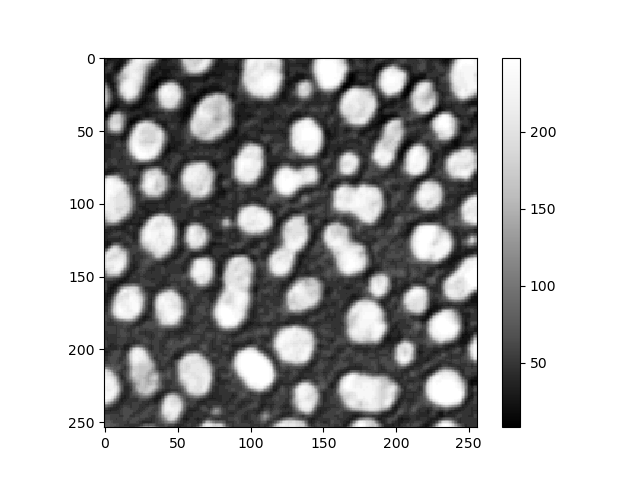
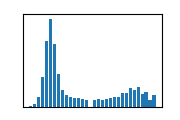

In [2]:
blobs = imread('https://samples.fiji.sc/blobs.png')
stackview.insight(blobs)

## Denoising

### Median filter

StackViewNDArray([[ 40,  40,  32, ..., 232, 232, 232],
                  [ 40,  40,  32, ..., 232, 232, 232],
                  [ 40,  40,  32, ..., 232, 232, 232],
                  ...,
                  [ 72,  72,  72, ...,  48,  48,  48],
                  [ 72,  72,  72, ...,  48,  48,  48],
                  [ 80,  72,  72, ...,  48,  48,  48]], dtype=uint8)
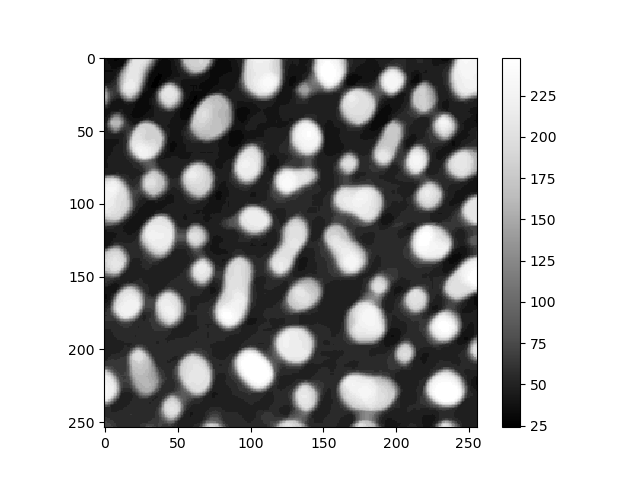
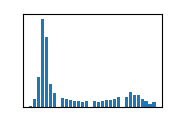

In [3]:
nsitk.median_filter(blobs, 5, 5, 0)

### Gaussian blur

StackViewNDArray([[ 36,  34,  33, ..., 225, 221, 218],
                  [ 37,  35,  34, ..., 227, 224, 221],
                  [ 37,  36,  35, ..., 229, 227, 224],
                  ...,
                  [ 74,  73,  71, ...,  47,  47,  47],
                  [ 77,  76,  74, ...,  47,  47,  47],
                  [ 80,  78,  76, ...,  47,  47,  47]], dtype=uint8)
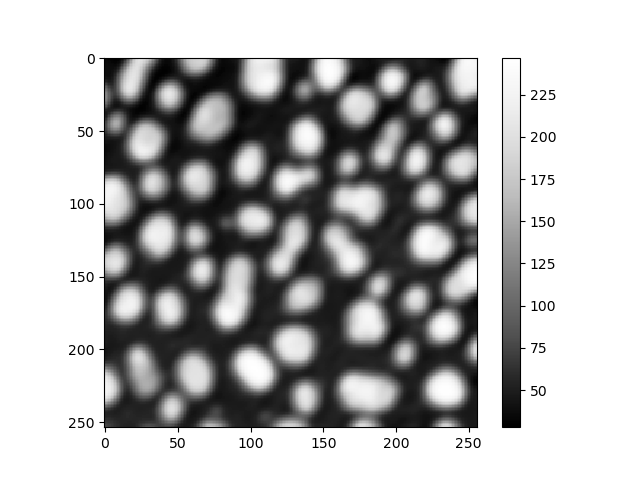
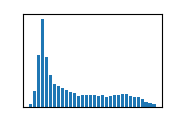

In [4]:
nsitk.gaussian_blur(blobs, 10, 10, 0)

## Background / foreground removal

StackViewNDArray([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
                  [16.,  8.,  0., ..., 32., 16.,  0.],
                  [24., 24.,  8., ..., 40., 32., 16.],
                  ...,
                  [ 0.,  8.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
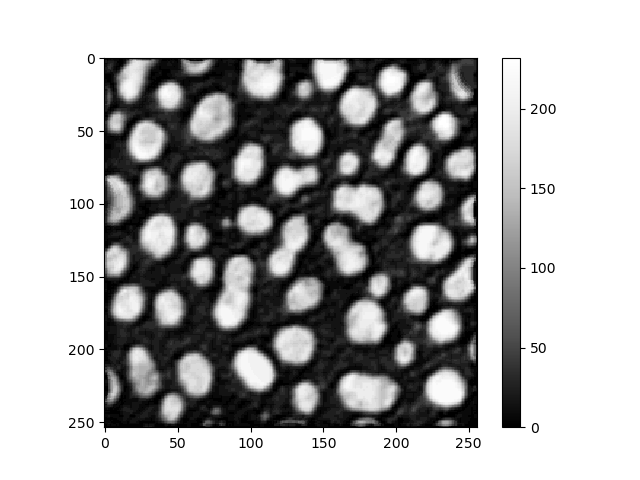
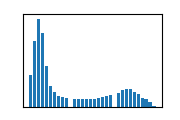

In [7]:
nsitk.white_top_hat(blobs, 20, 20)

StackViewNDArray([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  8., 16., ...,  0.,  0.,  0.],
                  ...,
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
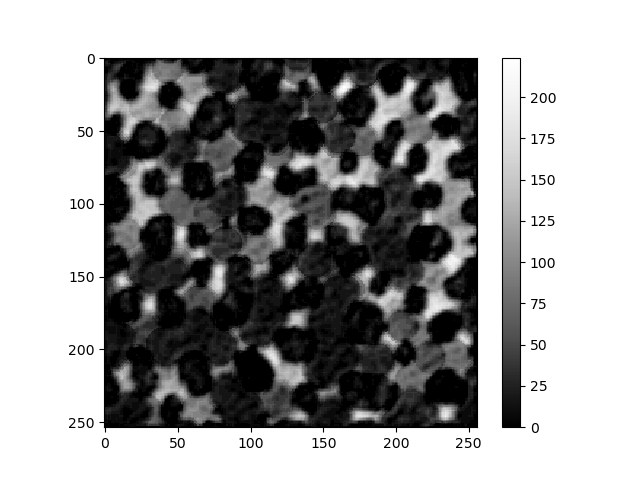
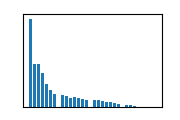

In [20]:
nsitk.black_top_hat(blobs)